In [163]:
import pandas as pd

df_expectancy = pd.read_csv('life_expactancy_data.csv')
df_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [162]:
df_expectancy.info()
df_expectancy.keys()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   string 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   string 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2928 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2928 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2928 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [73]:
df_expectancy['Country'] = df_expectancy['Country'].astype('string')
df_expectancy['Status'] = df_expectancy['Status'].astype('string')

### We do a little thing

https://www.kaggle.com/kumarajarshi/life-expectancy-who

Life expectancy - target variable

We will try several ways to fill missing data: 
 - deleting them
 - use mean taken from developing / developed countries
 
for missing values in 'Life expectancy' and 'Population' we will drop data.

In [74]:
# clean life expectancy of null variables.

df_expectancy = df_expectancy.dropna(subset = ['Life expectancy '])
df_expectancy['Life expectancy '].isnull().sum()

0

In [75]:
df_expectancy = df_expectancy.drop(axis=1, labels='Population')

In [76]:
# missing values

for column in df_expectancy.keys():
    print(column, df_expectancy[column].isnull().sum())

Country 0
Year 0
Status 0
Life expectancy  0
Adult Mortality 0
infant deaths 0
Alcohol 193
percentage expenditure 0
Hepatitis B 553
Measles  0
 BMI  32
under-five deaths  0
Polio 19
Total expenditure 226
Diphtheria  19
 HIV/AIDS 0
GDP 443
 thinness  1-19 years 32
 thinness 5-9 years 32
Income composition of resources 160
Schooling 160


In [92]:
df_expectancy.columns[df_expectancy.isna().any()].tolist()

['Alcohol',
 'Hepatitis B',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [176]:
# split into developed and developing datasets
df_developing = df_expectancy[df_expectancy['Status'] == "Developing"]
df_developed = df_expectancy[df_expectancy['Status'] == "Developed"]

missing = df_expectancy.columns[df_expectancy.isna().any()].tolist()
for key in missing:
    mean_developing = df_developing[key].mean()
    mean_developed = df_developed[key].mean()
    df_developed = df_developed.fillna(value=mean_developed)
    df_developing = df_developing.fillna(value=mean_developing)

# merge them back
df_expectancy_filled= df_developing.append(df_developed)
df_expectancy_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2809
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [179]:
corr_matrix = df_expectancy_filled.corr()
corr_matrix['Life expectancy '].sort_values(ascending=False)

Life expectancy                    1.000000
 BMI                               0.532901
Diphtheria                         0.478783
Polio                              0.465041
GDP                                0.429351
percentage expenditure             0.381990
Hepatitis B                        0.271922
Year                               0.168709
Schooling                          0.132367
Alcohol                            0.122330
Total expenditure                  0.038796
Population                        -0.029806
Income composition of resources   -0.031879
Measles                           -0.157401
infant deaths                     -0.196324
under-five deaths                 -0.222286
 thinness 5-9 years               -0.362468
 thinness  1-19 years             -0.362512
 HIV/AIDS                         -0.556165
Adult Mortality                   -0.694977
Name: Life expectancy , dtype: float64

array([[<AxesSubplot:xlabel='Life expectancy ', ylabel='Life expectancy '>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy '>,
        <AxesSubplot:xlabel='Schooling', ylabel='Life expectancy '>],
       [<AxesSubplot:xlabel='Life expectancy ', ylabel='Adult Mortality'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Adult Mortality'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Adult Mortality'>],
       [<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Schooling'>]],
      dtype=object)

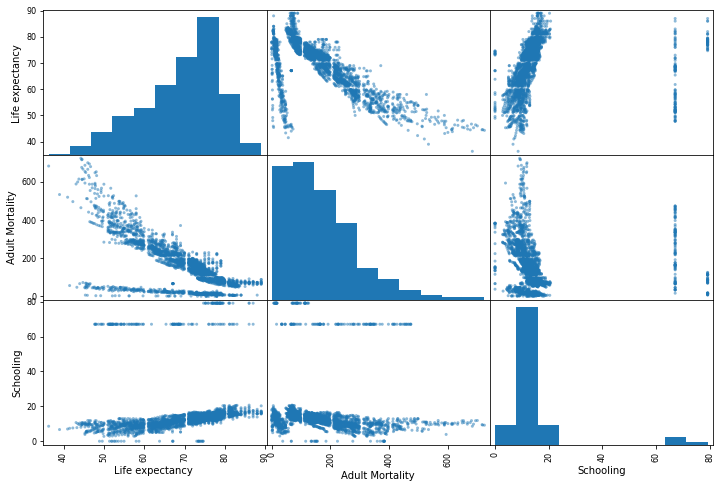

In [180]:
# we did lose some things

attributes = ['Life expectancy ', 'Adult Mortality', 'Schooling']
pd.plotting.scatter_matrix(df_expectancy_filled[attributes], figsize=(12, 8))